### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
ingresos_tienda = df_tiendas.groupby('Lugar de Compra')['Precio'].sum()
ingresos_tienda_descendente = ingresos_tienda.sort_values(ascending=False)
ingresos_tienda_descendente

,Precio
Lugar de Compra,
Bogotá,1.814858e+09
Medellín,1.096669e+09
Cali,5.065261e+08
Pereira,2.259273e+08
Barranquilla,1.320405e+08
Cartagena,1.023767e+08
Cúcuta,9.936910e+07
Bucaramanga,9.057330e+07
Riohacha,7.387970e+07


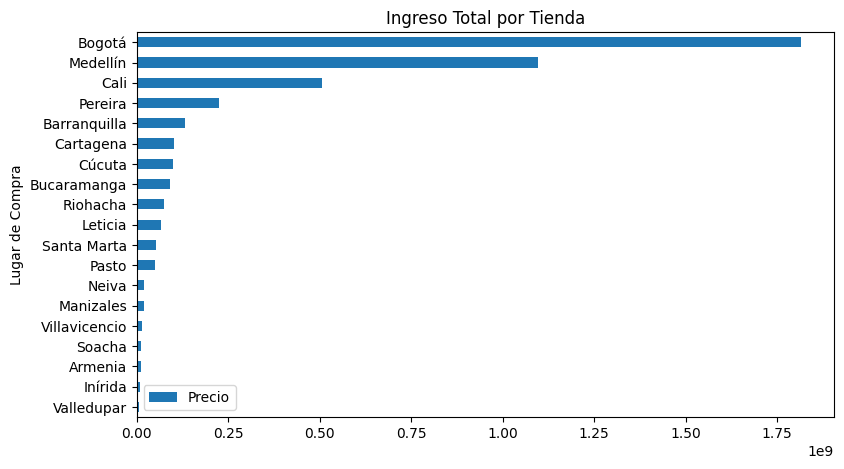

In [37]:
import matplotlib.pyplot as plt
ingresos_tienda = df_tiendas.groupby('Lugar de Compra')[['Precio']].sum().sort_values('Precio', ascending=True)
ingresos_tienda.plot(
    kind='barh',
    figsize=(9, 5),
    title='Ingreso Total por Tienda'
)
plt.show()

# 2. Ventas por categoría

In [4]:
ventas_por_categoria = df_tiendas.groupby(['Lugar de Compra', 'Categoría del Producto']).size()
ventas_por_categoria_df = ventas_por_categoria.to_frame(name='Cantidad Vendida')

In [5]:
productos_populares = ventas_por_categoria_df.sort_values(by='Cantidad Vendida', ascending=False)
productos_populares

Cantidad Vendida
Lugar de Compra Categoría del Producto                   
Bogotá          Muebles                               767
                Electrónicos                          709
                Juguetes                              553
                Electrodomésticos                     498
                Deportes y diversión                  485
...                                                   ...
Valledupar      Electrónicos                            1
                Libros                                  1
                Instrumentos musicales                  1
Villavicencio   Artículos para el hogar                 1
                Libros                                  1

[147 rows x 1 columns]

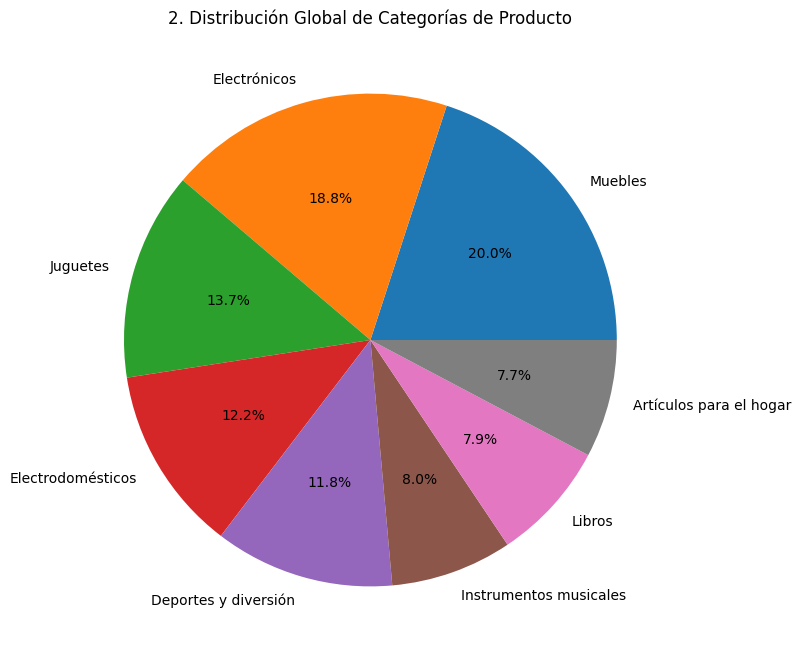

In [34]:
conteo_categorias = df_tiendas['Categoría del Producto'].value_counts()
conteo_categorias.plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%1.1f%%',
    title='2. Distribución Global de Categorías de Producto'
)
plt.ylabel('')
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
calificacion_promedio = df_tiendas.groupby('Lugar de Compra')['Calificación'].mean()

In [7]:
calificacion_descendente = calificacion_promedio.sort_values(ascending=False)
calificacion_descendente

,Calificación
Lugar de Compra,
Pasto,4.148936
Bogotá,4.113619
Valledupar,4.071429
Cali,4.046673
Cartagena,4.020661
Pereira,4.013540
Bucaramanga,3.977901
Cúcuta,3.940860
Medellín,3.926534


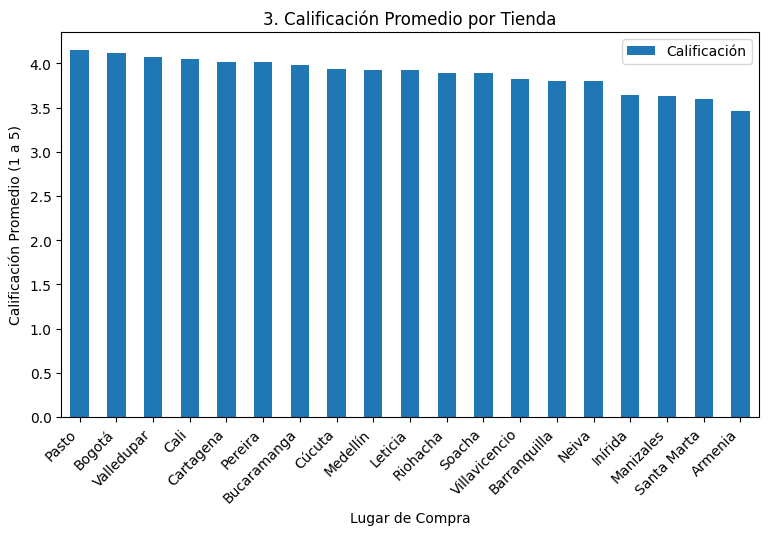

In [38]:
calificacion_promedio = df_tiendas.groupby('Lugar de Compra')[['Calificación']].mean().sort_values('Calificación', ascending=False)
calificacion_promedio.plot(
    kind='bar',
    figsize=(9, 5),
    title='3. Calificación Promedio por Tienda'
)
plt.ylabel('Calificación Promedio (1 a 5)')
plt.xlabel('Lugar de Compra')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Productos más y menos vendidos

In [11]:
cantidad_productos = df_tiendas.groupby(['Lugar de Compra', 'Producto']).size()
cantidad_productos_df = cantidad_productos.to_frame(name='Cantidad Vendida')

In [49]:
cantidad_productos_ordenados = cantidad_productos_df.sort_values(by='Cantidad Vendida', ascending=False)
print(" Conteo de Ventas por Producto en cada Tienda (Ordenado de Mayor a Menor Venta):\n")
cantidad_productos_ordenados

 Conteo de Ventas por Producto en cada Tienda (Ordenado de Mayor a Menor Venta):



Cantidad Vendida
Lugar de Compra Producto                                     
Bogotá          Carrito de control remoto                 104
                Vaso térmico                               98
                Microondas                                 89
                Bloques de construcción                    89
                Mesa de noche                              89
...                                                       ...
Soacha          Ciencia de datos con Python                 1
                Guitarra eléctrica                          1
                Mesa de comedor                             1
                Microondas                                  1
                Secadora de ropa                            1

[722 rows x 1 columns]

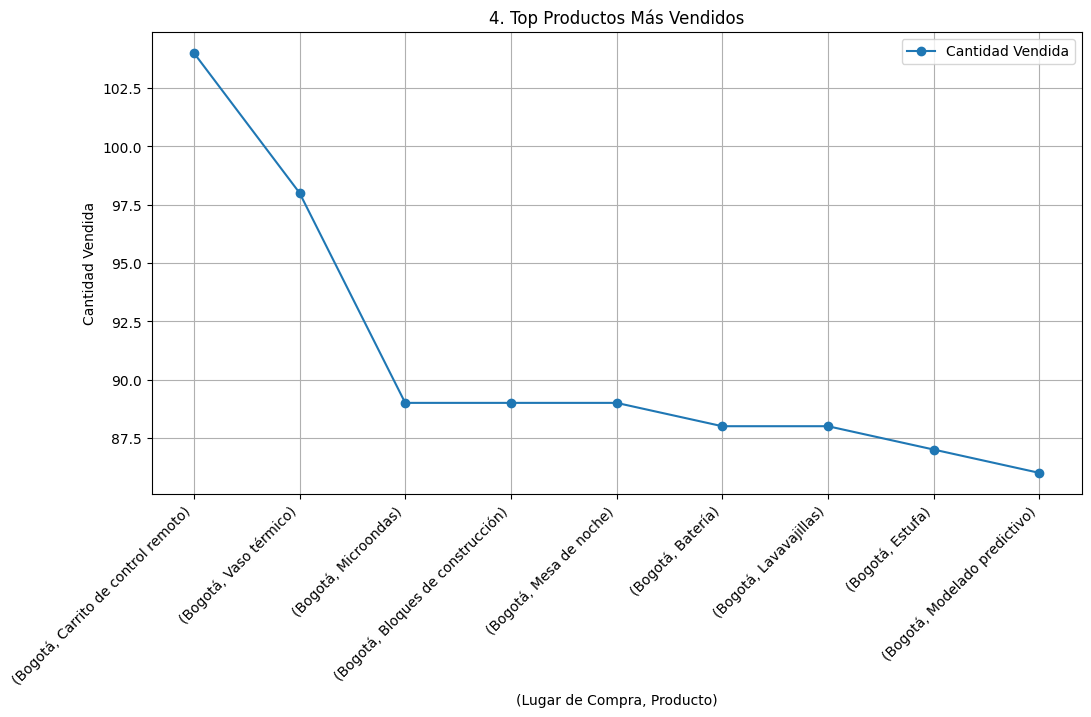

In [52]:
top_productos = cantidad_productos_ordenados.head(9)
top_productos.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    title='4. Top Productos Más Vendidos'
)
plt.xlabel('(Lugar de Compra, Producto)')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# 5. Envío promedio por tienda

In [14]:
envio_promedio = df_tiendas.groupby('Lugar de Compra')['Costo de envío'].mean()

In [15]:
envio_promedio_ordenado = envio_promedio.sort_values(ascending=False)
envio_promedio_ordenado

,Costo de envío
Lugar de Compra,
Soacha,34768.421053
Inírida,30557.142857
Cúcuta,28597.311828
Pasto,27801.063830
Neiva,27710.000000
Bucaramanga,26790.055249
Cali,26726.812314
Leticia,25317.605634
Medellín,25282.022472


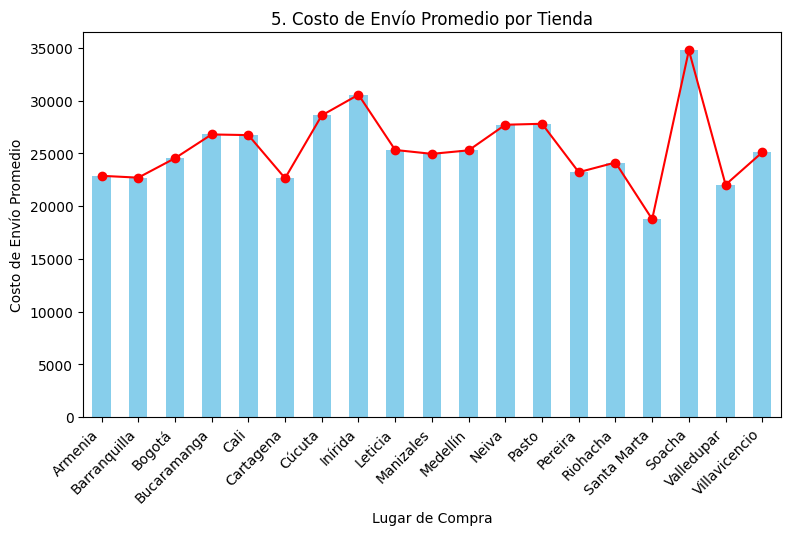

In [51]:
ax = envio_promedio.plot(
    kind='bar',
    figsize=(9, 5),
    title='5. Costo de Envío Promedio por Tienda',
    color='skyblue',
    legend=False
)
envio_promedio.plot(
    kind='line',
    ax=ax,
    color='red',
    marker='o',
    legend=False
)
plt.ylabel('Costo de Envío Promedio')
plt.xlabel('Lugar de Compra')
plt.xticks(rotation=45, ha='right')
plt.show()

# **INFORME**

## 1. El Objetivo
He revisado a fondo sus tiendas (ingresos, calificaciones, costos y qué se vende) para identificar cuál es el "punto débil" de su negocio. La meta es simple: decirle cuál tienda debe vender para que pueda enfocar su dinero y energía en las que sí dan resultados.
## 2. Los Números Hablan
La decisión es fácil cuando se mira dónde está el dinero y dónde están los problemas.

| Indicador | La Ganadora (Fortaleza) | La Perdedora (Debilidad) |
 | ----- | ----- | ----- |
| **Ingresos** | Bogotá (¡Máxima productiva!) | **Santa Marta** (Ingreso más bajo de la red) |
| **Calificación (0-5)** | Alto en general (>4), ¡buen trabajo! | **Santa Marta** (Clientes menos contentos, la calificación más baja) |
| **Ventas Top** | Dominio de Electrónica y Hogar | Santa Marta no entra en el ranking de productos clave |
| **Costo de Envío** | Variable | Leticia (Costo de envío alto comparado con su ingreso) |

### El Problema de Santa Marta es Triple:
1. **Poco Dinero (Gráfico 1):** Es la que menos ingresos genera. Simplemente no está vendiendo suficiente para justificar su existencia.
2. **Mala Fama (Gráfico 3):** Tiene la peor calificación de clientes. Esto no solo es un problema hoy, sino que frena el crecimiento futuro.
3. **Irrelevancia (Gráfico 4):** Sus productos no son parte del "Top" que realmente mueve las agujas del negocio.

## 3. Conclusión: La Venta Estratégica

**Sr. Juan, la recomendación directa es vender la tienda ubicada en Santa Marta.**

**Justificación:** Vender Santa Marta es deshacerse de un **activo que es un dolor de cabeza y no produce**. Está en el último lugar tanto en **rentabilidad** como en **satisfacción del cliente**.

Al venderla, usted:

* **Elimina** la tienda que le quita más tiempo y genera menos ganancias.

* **Libera capital** para invertirlo en tiendas que sí funcionan (como Bogotá o Cali) para que crezcan aún más.

Es una decisión de negocio inteligente: corte las pérdidas y potencie las ganancias.

# **EXTRA**

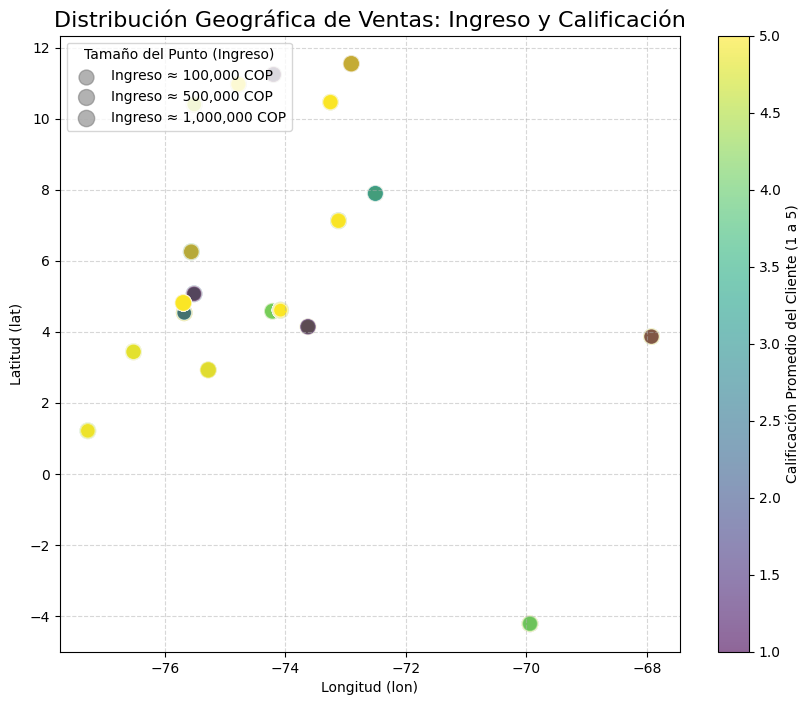


--- Análisis de la Concentración Geográfica ---
Este gráfico de dispersión muestra las transacciones individuales:
1. El tamaño del círculo indica el Ingreso (Precio): Los círculos grandes son ventas caras.
2. El color del círculo indica la Calificación: Los colores más claros (amarillo/verde) son calificaciones altas.
Las áreas con CÍRCULOS GRANDES y CLAROS representan las zonas geográficas más valiosas para el negocio.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tamanos = np.log1p(df_tiendas['Precio']) * 10

colores = df_tiendas['Calificación']

plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    x=df_tiendas['lon'],
    y=df_tiendas['lat'],
    s=tamanos,
    c=colores,
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidths=0.5
)

plt.title('Distribución Geográfica de Ventas: Ingreso y Calificación', fontsize=16)
plt.xlabel('Longitud (lon)')
plt.ylabel('Latitud (lat)')
plt.grid(True, linestyle='--', alpha=0.5)

cbar = plt.colorbar(scatter, label='Calificación Promedio del Cliente (1 a 5)')

for ingreso in [100000, 500000, 1000000]:
    plt.scatter([], [], s=np.log1p(ingreso) * 10, label=f'Ingreso ≈ {ingreso:,.0f} COP', color='gray', alpha=0.6)

plt.legend(title='Tamaño del Punto (Ingreso)', loc='upper left')
plt.show()

print("\n--- Análisis de la Concentración Geográfica ---")
print("Este gráfico de dispersión muestra las transacciones individuales:")
print("1. El tamaño del círculo indica el Ingreso (Precio): Los círculos grandes son ventas caras.")
print("2. El color del círculo indica la Calificación: Los colores más claros (amarillo/verde) son calificaciones altas.")
print("Las áreas con CÍRCULOS GRANDES y CLAROS representan las zonas geográficas más valiosas para el negocio.")